In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [2]:
data=pd.read_csv('hotel_bookings.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.isnull().sum().sum()

129425

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.drop("company",axis=1,inplace=True)
data.drop("reservation_status",axis=1,inplace=True)
data.drop("reservation_status_date",axis=1,inplace=True)


In [7]:
data['agent'].fillna(0,inplace=True)

In [8]:
data['agent'].value_counts

<bound method IndexOpsMixin.value_counts of 0           0.0
1           0.0
2           0.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64>

In [9]:
data.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [10]:
data["country"].fillna("PRT", inplace=True)

In [11]:
data.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [12]:
encoder=LabelEncoder()
data["country"]=encoder.fit_transform(data["country"])
data["hotel"]=encoder.fit_transform(data["hotel"])
data["market_segment"]=encoder.fit_transform(data["market_segment"])
data["meal"]=encoder.fit_transform(data["meal"])
data["deposit_type"]=encoder.fit_transform(data["deposit_type"])
data["assigned_room_type"]=encoder.fit_transform(data["assigned_room_type"])
data["reserved_room_type"]=encoder.fit_transform(data["reserved_room_type"])
data["distribution_channel"]=encoder.fit_transform(data["distribution_channel"])
data["arrival_date_month"]=encoder.fit_transform(data["arrival_date_month"])
data["customer_type"]=encoder.fit_transform(data["customer_type"])

In [13]:
data["children"].fillna(data["children"].mean(), inplace=True)

In [14]:
data.isnull().sum().sum()

0

In [15]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    
    def plot_roc_curve(self, model, part='h1', save=False):
        probs = model.predict_proba(self.X)
        preds = probs[:, 1]

        fpr, tpr, threshold = roc_curve(self.y, preds)
        roc_auc = auc(fpr, tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        plt.show()

In [16]:

x = data[['country',"hotel",'market_segment',"meal","deposit_type",
          "assigned_room_type","reserved_room_type",
          "distribution_channel","arrival_date_month","lead_time",
          "arrival_date_year",]]

y = data['is_canceled']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

  

In [17]:
log = LogisticRegression(max_iter=1200).fit(x_train, y_train)
report = Report(x_test, y_test)

Accuracy score:

0.7536518359689092

Confusion Matrix:

[[17411  1221]
 [ 6132  5084]]

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.93      0.83     18632
           1       0.81      0.45      0.58     11216

    accuracy                           0.75     29848
   macro avg       0.77      0.69      0.70     29848
weighted avg       0.76      0.75      0.73     29848



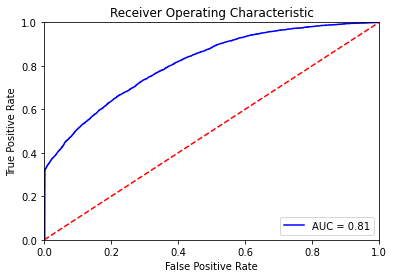

In [18]:
report.metrics(log)
report.plot_roc_curve(log)

In [19]:

cross_val_score(log,  x_test, y_test, cv=10).mean()

0.7551926073621009

Accuracy score:

0.7959327258107746

Confusion Matrix:

[[16053  2579]
 [ 3512  7704]]

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     18632
           1       0.75      0.69      0.72     11216

    accuracy                           0.80     29848
   macro avg       0.78      0.77      0.78     29848
weighted avg       0.79      0.80      0.79     29848



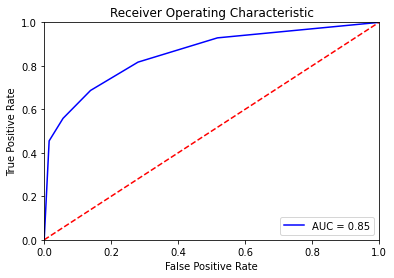

In [20]:
knn = KNeighborsClassifier().fit(x_train, y_train)
report.metrics(knn)
report.plot_roc_curve(knn)

In [21]:
knn_params = {'n_neighbors': range(1, 11)}

In [22]:
params = {
    'estimator': knn,
    'param_grid': knn_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'recall',
}
knn_cv = GridSearchCV(**params)

In [23]:
_ = knn_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.4s finished


In [24]:
knn_cv.best_params_

{'n_neighbors': 1}

In [25]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(x_train, y_train)

Accuracy score:

0.7939225408737604

Confusion Matrix:

[[15466  3166]
 [ 2985  8231]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     18632
           1       0.72      0.73      0.73     11216

    accuracy                           0.79     29848
   macro avg       0.78      0.78      0.78     29848
weighted avg       0.79      0.79      0.79     29848



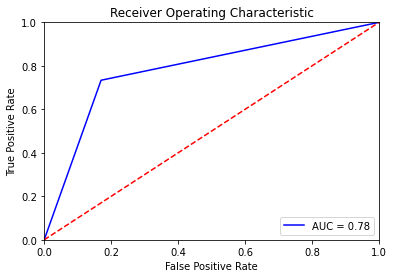

In [26]:
report.metrics(knn)
report.plot_roc_curve(knn)

In [27]:
cart = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)

Accuracy score:

0.7463481640310908

Confusion Matrix:

[[18605    27]
 [ 7544  3672]]

Classification Report:

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     18632
           1       0.99      0.33      0.49     11216

    accuracy                           0.75     29848
   macro avg       0.85      0.66      0.66     29848
weighted avg       0.82      0.75      0.70     29848



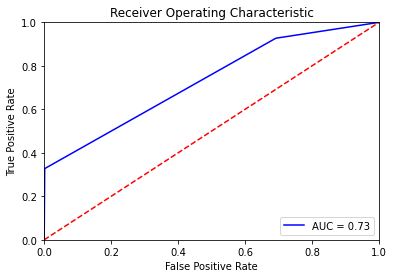

In [28]:
report.metrics(cart)
report.plot_roc_curve(cart)

In [29]:
cart_params = {
    'max_depth': range(5, 25, 5),
    'min_samples_split' : range(2, 50), 
}

In [30]:
params = {
    'estimator': cart,
    'param_grid': cart_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'recall',
}
cart_cv = GridSearchCV(**params)

In [31]:
_ = cart_cv.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.6min finished


In [32]:
cart_cv.best_params_

{'max_depth': 20, 'min_samples_split': 2}

In [33]:
cart = DecisionTreeClassifier(**cart_cv.best_params_).fit(x_train, y_train)

Accuracy score:

0.8082618600911284

Confusion Matrix:

[[16491  2141]
 [ 3582  7634]]

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     18632
           1       0.78      0.68      0.73     11216

    accuracy                           0.81     29848
   macro avg       0.80      0.78      0.79     29848
weighted avg       0.81      0.81      0.81     29848



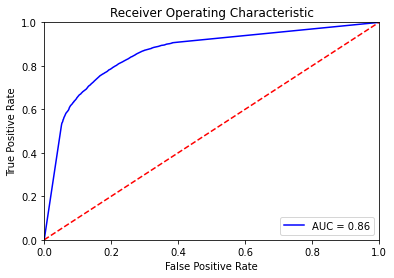

In [34]:
report.metrics(cart)
report.plot_roc_curve(cart)

In [35]:
rf = RandomForestClassifier().fit(x_train, y_train)

Accuracy score:

0.8347627981774324

Confusion Matrix:

[[16613  2019]
 [ 2913  8303]]

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     18632
           1       0.80      0.74      0.77     11216

    accuracy                           0.83     29848
   macro avg       0.83      0.82      0.82     29848
weighted avg       0.83      0.83      0.83     29848



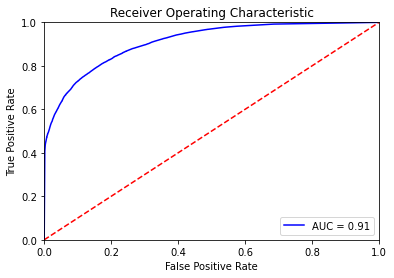

In [36]:
report.metrics(rf)
report.plot_roc_curve(rf)

In [37]:
rf_params = {
    'max_depth': [5, 10, 15, 20],
    'max_features': [2, 3, 5],
    'n_estimators': [100, 500, 1000],
    'min_samples_split': [5, 10, 15],
}

In [38]:
params = {
    'estimator': rf,
    'param_grid': rf_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'recall',
}
rf_cv = GridSearchCV(**params)

In [ ]:
_ = rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 43.1min


In [ ]:
rf_cv.best_params_

In [ ]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(x_train, y_train)

In [ ]:
report.metrics(rf)
report.plot_roc_curve(rf, save=True)

In [ ]:

xtr_last, xte_last, ytr_last, yte_last = train_test_split(x_train, y_train, test_size=.2, random_state=40)

In [ ]:
report = Report(xte_last, yte_last)

params = {
    'KNeighborsClassifier': {'n_neighbors': 1},
    'DecisionTreeClassifier': { 'max_depth': 20,
                                'min_samples_split': 2},

    'RandomForestClassifier':{'max_depth': 20, 
                              'max_features': 5,
                              'min_samples_split': 5,
                              'n_estimators': 100}}
    


rf = RandomForestClassifier(**params['RandomForestClassifier'])
knn = KNeighborsClassifier(**params['KNeighborsClassifier'])
cart = DecisionTreeClassifier(**params['DecisionTreeClassifier'])


for model in [rf, knn, cart, ]:
    print(model.__class__.__name__)
    _ = model.fit(xtr_last, ytr_last)
    report.metrics(model)
    report.plot_roc_curve(model, part='h2')